INSTALLING NECESSARY PACKAGES

In [22]:
pip install cryptography pymysql sqlalchemy pandas

Note: you may need to restart the kernel to use updated packages.


IMPORTING CLEANED DATASET FROM MYSQL SERVER

In [2]:

import pandas as pd
from sqlalchemy import create_engine
import urllib.parse
import pymysql

# Ensure the cryptography package is installed
try:
    import cryptography
except ImportError:
    !pip install cryptography
    import cryptography

# Database connection details
user = 'root'
password = urllib.parse.quote_plus('Navaneeth@2000')
host = 'localhost'
port = '3306'
database = 'machine_data'

# Create an engine
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'
try:
    engine = create_engine(connection_string)
    print("Connection to database successful!")
except Exception as e:
    print(f"Error connecting to database: {e}")

# Test query to check connection
test_query = "SELECT 1"
try:
    with engine.connect() as connection:
        result = connection.execute(test_query)
        print("Test query executed successfully, result:", result.fetchone())
except Exception as e:
    print(f"Error executing test query: {e}")

# Define your SQL query
query = """
SELECT * 
FROM machine_downtime;
"""

# Load the data into a DataFrame
try:
    data = pd.read_sql(query, engine)
    print("Data loaded successfully!")
    # Display the first few rows of the DataFrame
    print(data.head())
except Exception as e:
    print(f"Error loading data: {e}")

Connection to database successful!
Error executing test query: Not an executable object: 'SELECT 1'
Data loaded successfully!
         Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure  Air_System_Pressure(bar)  Coolant_Temperature  \
0           6.93372                  6.284965                 25.6   
1           4.93689                  6.196733                 35.3   
2           6.83941                  6.655448                 13.1   
3           4.57438                  6.560394                 24.4   
4           6.89318                  

LIBRARIES IMPORT


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import skew, kurtosis

EXPLORATORY DATA ANALYSIS

In [38]:
# Select only numerical columns for EDA
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Calculate measures of central tendency
mean_values = data[numerical_cols].mean()
median_values = data[numerical_cols].median()
mode_values = data[numerical_cols].mode().iloc[0]

# Calculate measures of dispersion
std_dev = data[numerical_cols].std()
variance = data[numerical_cols].var()
range_values = data[numerical_cols].max() - data[numerical_cols].min()
iqr_values = data[numerical_cols].quantile(0.75) - data[numerical_cols].quantile(0.25)

# Calculate skewness and kurtosis
skewness = data[numerical_cols].apply(lambda x: skew(x.dropna()))
kurt = data[numerical_cols].apply(lambda x: kurtosis(x.dropna()))

# Print the calculated statistics
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation:\n", std_dev)
print("\nVariance:\n", variance)
print("\nRange:\n", range_values)
print("\nInterquartile Range:\n", iqr_values)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurt)

Mean Values:
 Date                    8.051659e+01
Hydraulic_Pressure      7.460550e-17
Coolant_Pressure       -1.268293e-16
Air_System_Pressure     1.283215e-15
Coolant_Temperature    -8.952659e-18
Hydraulic_Oil_Temp     -1.411536e-15
Spindle_Bearing_Temp    1.119082e-15
Spindle_Vibration      -8.355815e-17
Tool_Vibration          1.604018e-16
Spindle_Speed          -3.461695e-16
Voltage(volts)         -1.098193e-15
Torque(Nm)              3.700433e-16
Cutting                 1.551794e-16
Downtime                4.829903e-01
Predicted_Downtime      2.364553e-01
Machine_Line_Combo      9.823604e-01
dtype: float64

Median Values:
 Date                    81.000000
Hydraulic_Pressure      -0.166344
Coolant_Pressure        -0.012750
Air_System_Pressure      0.015255
Coolant_Temperature      0.311091
Hydraulic_Oil_Temp       0.024287
Spindle_Bearing_Temp     0.008713
Spindle_Vibration       -0.002700
Tool_Vibration           0.003797
Spindle_Speed           -0.049800
Voltage(volts)        


PREPROCESSING DATA


In [35]:
# Basic information and statistical summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2381 non-null   int32  
 1   Hydraulic_Pressure    2381 non-null   float64
 2   Coolant_Pressure      2381 non-null   float64
 3   Air_System_Pressure   2381 non-null   float64
 4   Coolant_Temperature   2381 non-null   float64
 5   Hydraulic_Oil_Temp    2381 non-null   float64
 6   Spindle_Bearing_Temp  2381 non-null   float64
 7   Spindle_Vibration     2381 non-null   float64
 8   Tool_Vibration        2381 non-null   float64
 9   Spindle_Speed         2381 non-null   float64
 10  Voltage(volts)        2381 non-null   float64
 11  Torque(Nm)            2381 non-null   float64
 12  Cutting               2381 non-null   float64
 13  Downtime              2381 non-null   int32  
 14  Predicted_Downtime    2381 non-null   int32  
 15  Machine_Line_Combo   

In [5]:
data.describe(include='all') 

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure,Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting,Downtime
count,2381,2381,2381,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381
unique,162,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2022-03-15,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine_Failure
freq,62,830,830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1231
mean,NaN,NaN,NaN,101.184167,4.955531,6.499094,18.518774,47.616422,35.064763,1.007646,25.415098,20271.568249,349.101638,25.196960,0.462716,NaN
std,NaN,NaN,NaN,30.323683,1.000772,0.406355,8.360034,3.757603,3.764735,0.341260,6.455127,3853.673196,45.277313,6.151921,0.289084,NaN
min,NaN,NaN,NaN,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,3.469000,0.000000,202.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,76.220000,4.470510,6.218482,10.500000,45.100000,32.500000,0.777000,21.056000,17919.000000,319.000000,21.653830,0.220657,NaN
50%,NaN,NaN,NaN,96.165147,4.940500,6.505191,21.100000,47.700000,35.100000,1.007000,25.437000,20126.000000,349.000000,24.633746,0.455399,NaN
75%,NaN,NaN,NaN,126.302016,5.526440,6.780411,25.600000,50.100000,37.600000,1.233000,29.826000,22492.000000,380.000000,30.514008,0.690141,NaN


In [6]:
data.isnull().sum() #CHECKING NULL VALUES

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)             0
Coolant_Pressure                    0
Air_System_Pressure(bar)            0
Coolant_Temperature                 0
Hydraulic_Oil_Temperature(Â°C)      0
Spindle_Bearing_Temperature(Â°C)    0
Spindle_Vibration(Âµm)              0
Tool_Vibration(Âµm)                 0
Spindle_Speed(RPM)                  0
Voltage(volts)                      0
Torque(Nm)                          0
Cutting                             0
Downtime                            0
dtype: int64

In [7]:
# Handle outliers
def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    return series.clip(lower_limit, upper_limit)


In [8]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features] = data[numeric_features].apply(cap_outliers)


In [9]:
# Encode categorical variables
label_encoders = {}
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

In [10]:
# Standardize numeric features
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [11]:
# Final data overview
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              2381 non-null   int32  
 1   Machine_ID                        2381 non-null   int32  
 2   Assembly_Line_No                  2381 non-null   int32  
 3   Hydraulic_Pressure(bar)           2381 non-null   float64
 4   Coolant_Pressure                  2381 non-null   float64
 5   Air_System_Pressure(bar)          2381 non-null   float64
 6   Coolant_Temperature               2381 non-null   float64
 7   Hydraulic_Oil_Temperature(Â°C)    2381 non-null   float64
 8   Spindle_Bearing_Temperature(Â°C)  2381 non-null   float64
 9   Spindle_Vibration(Âµm)            2381 non-null   float64
 10  Tool_Vibration(Âµm)               2381 non-null   float64
 11  Spindle_Speed(RPM)                2381 non-null   float64
 12  Voltag

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure,Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(Â°C),Spindle_Bearing_Temperature(Â°C),Spindle_Vibration(Âµm),Tool_Vibration(Âµm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting,Downtime
0,11,0,0,-1.002912,2.018474,-0.538692,0.851203,-0.437023,-0.451227,0.843371,0.169876,1.503742,-0.316074,-0.188229,1.290465,0
1,11,0,0,0.804731,-0.016428,-0.760626,1.691376,-0.057121,-0.126563,1.114471,-0.021863,-0.122547,0.423703,-1.807203,-0.171553,0
2,11,2,2,-1.000248,1.922366,0.393203,-0.649106,-1.875225,-0.559448,0.926787,0.817821,-0.123894,-0.540249,-0.189225,1.241729,0
3,154,1,1,1.271209,-0.385850,0.154108,0.707173,-0.925469,1.496754,-1.161578,0.846629,-0.498404,0.244363,0.108324,1.241729,0
4,98,0,0,-1.353519,1.977161,-0.900214,-1.681319,-0.084257,-0.992333,-0.074199,0.016233,1.674562,0.109858,0.051771,1.241729,0


In [12]:
data_null = data.isnull().sum().sum()
print("Total missing values: ", data_null)

Total missing values:  0


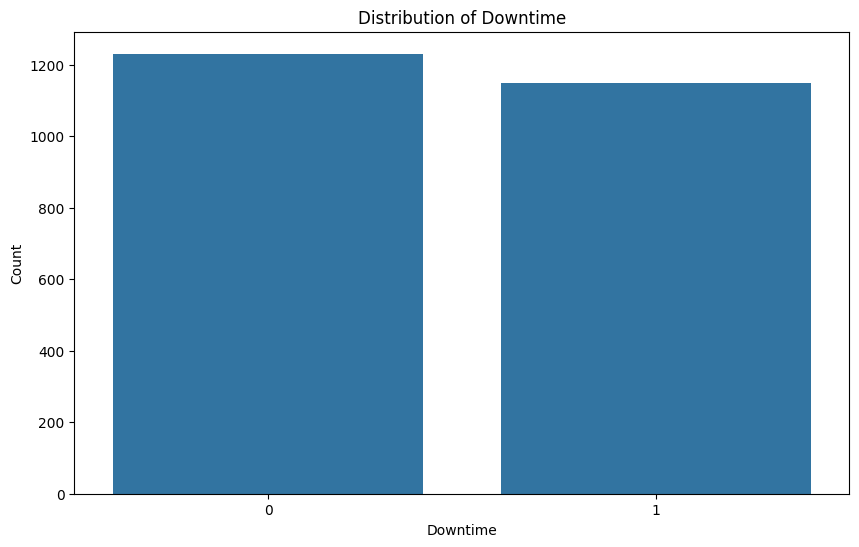

In [47]:
# Distribution of Downtime
plt.figure(figsize=(10, 6))
sns.countplot(x='Downtime', data=data)
plt.title('Distribution of Downtime')
plt.xlabel('Downtime')
plt.ylabel('Count')
plt.show()

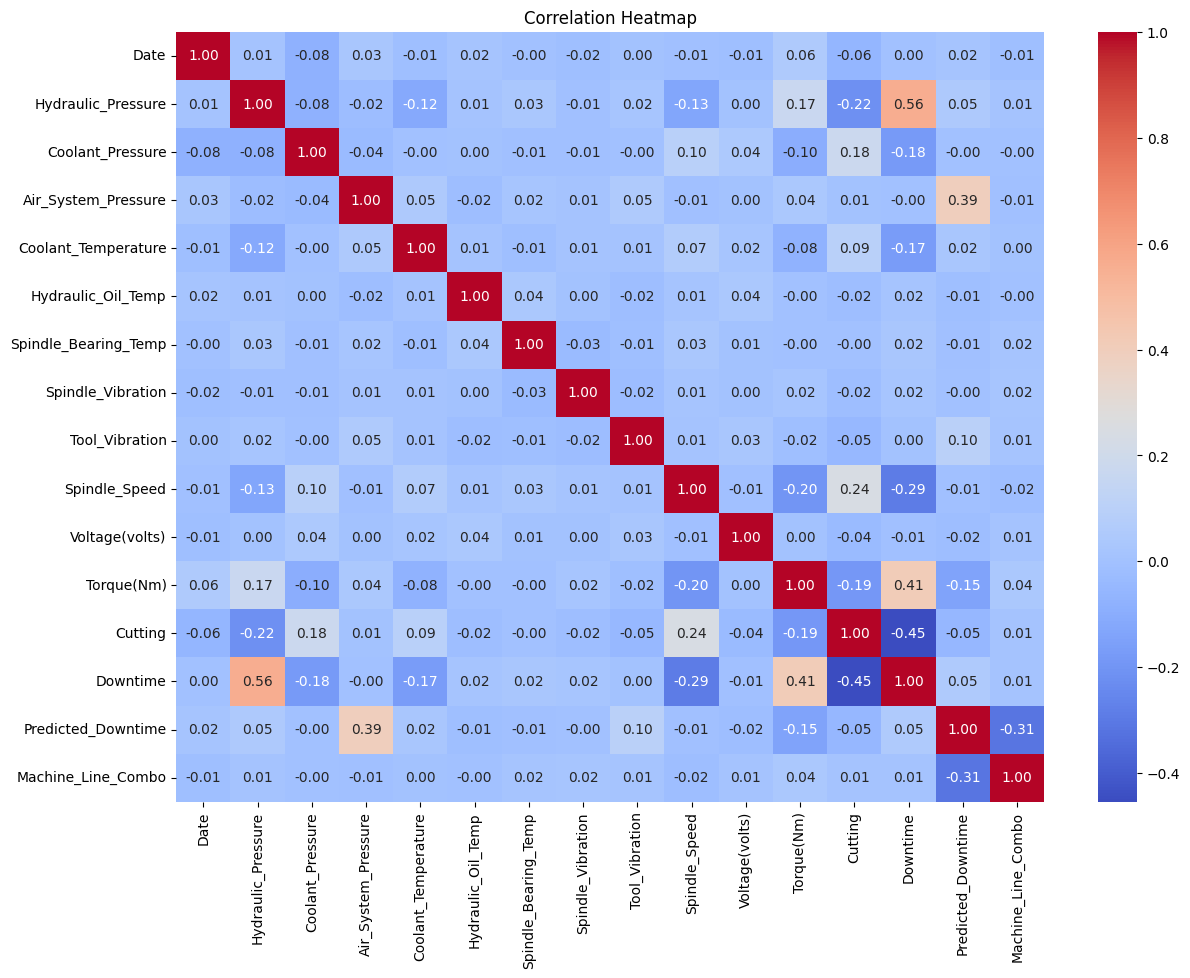

In [48]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
#RENAMING THE COLUMNS
rename_columns = {
    'Hydraulic_Pressure(bar)':'Hydraulic_Pressure',
    'Air_System_Pressure(bar)': 'Air_System_Pressure',
    'Hydraulic_Oil_Temperature(Â°C)' : 'Hydraulic_Oil_Temp',
    'Spindle_Bearing_Temperature(Â°C)' : 'Spindle_Bearing_Temp',
    'Spindle_Vibration(Âµm)' : 'Spindle_Vibration',
    'Tool_Vibration(Âµm)' : 'Tool_Vibration',
    'Spindle_Speed(RPM)' : 'Spindle_Speed',
    'Voltage(volts)	': 'Voltage',   
    'Torque	': 'Torque'
}
data.rename(rename_columns, axis = 1, inplace = True)

In [14]:
data

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure,Coolant_Pressure,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temp,Spindle_Bearing_Temp,Spindle_Vibration,Tool_Vibration,Spindle_Speed,Voltage(volts),Torque(Nm),Cutting,Downtime
0,11,0,0,-1.002912,2.018474,-0.538692,0.851203,-0.437023,-0.451227,0.843371,0.169876,1.503742,-0.316074,-0.188229,1.290465,0
1,11,0,0,0.804731,-0.016428,-0.760626,1.691376,-0.057121,-0.126563,1.114471,-0.021863,-0.122547,0.423703,-1.807203,-0.171553,0
2,11,2,2,-1.000248,1.922366,0.393203,-0.649106,-1.875225,-0.559448,0.926787,0.817821,-0.123894,-0.540249,-0.189225,1.241729,0
3,154,1,1,1.271209,-0.385850,0.154108,0.707173,-0.925469,1.496754,-1.161578,0.846629,-0.498404,0.244363,0.108324,1.241729,0
4,98,0,0,-1.353519,1.977161,-0.900214,-1.681319,-0.084257,-0.992333,-0.074199,0.016233,1.674562,0.109858,0.051771,1.241729,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,40,1,1,1.023296,0.273659,0.186803,0.467124,-0.572703,-0.694724,0.798684,-0.312147,0.179756,0.916887,-0.401529,0.250805,1
2377,40,0,0,0.384718,0.272976,-0.760934,0.455121,0.322781,0.576874,-0.291675,-0.807708,0.178678,-1.504201,-0.400815,-0.106576,1
2378,40,0,0,0.064115,0.263815,1.447646,-0.793136,0.187102,-0.965277,0.292234,1.463246,0.172481,-0.674754,-0.396709,0.250805,1
2379,40,2,2,1.488161,0.259626,-0.242660,-0.757129,-0.844062,-0.802946,-0.038449,0.170821,0.168170,0.603042,-0.393848,0.007138,1


MODEL SELECTION, EVALUATION, DEPLOYMENT

In [25]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ----------------- ---------------------- 112.6/258.3 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [29]:
# Interaction terms
data['Machine_Line_Combo'] = data['Machine_ID'].astype(str) + '_' + data['Assembly_Line_No'].astype(str)

# Encode the new categorical variables
new_categorical_features = ['Machine_ID', 'Assembly_Line_No', 'Machine_Line_Combo']
for feature in new_categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

# Drop redundant columns if needed
data.drop(columns=['Machine_ID', 'Assembly_Line_No'], inplace=True)

# Update the feature set
X = data.drop(columns=['Downtime'])
y = data['Downtime']


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

# Define models to be used
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Define a voting classifier
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(voting_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Confusion Matrix:
[[241   2]
 [  1 249]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       243
           1       0.99      1.00      0.99       250

    accuracy                           0.99       493
   macro avg       0.99      0.99      0.99       493
weighted avg       0.99      0.99      0.99       493


Accuracy Score:
0.9939148073022313


ACCURACY SCORE = 99.39%

CHECKING OF TARGET REACH

In [32]:
# Assuming each unit of downtime costs $X (replace with actual value)
cost_per_downtime_unit = 2000  # Example value, replace with the actual cost

# Calculate the original unplanned downtime
original_downtime = np.sum(data['Downtime'])

# Predict downtime on the entire dataset to simulate model application
data['Predicted_Downtime'] = best_model.predict(X)

# Calculate the new unplanned downtime
new_downtime = np.sum(data['Predicted_Downtime'])

# Calculate the reduction in downtime
downtime_reduction = original_downtime - new_downtime
downtime_reduction_percent = (downtime_reduction / original_downtime) * 100

# Calculate cost savings
cost_savings = downtime_reduction * cost_per_downtime_unit

# Check if targets are met
reduction_target_met = downtime_reduction_percent >= 10
cost_saving_target_met = cost_savings >= 1_000_000

print(f"Original Downtime: {original_downtime}")
print(f"New Downtime: {new_downtime}")
print(f"Downtime Reduction: {downtime_reduction}")
print(f"Downtime Reduction (%): {downtime_reduction_percent:.2f}%")
print(f"Cost Savings: ${cost_savings:.2f}")

print(f"\nReduction Target Met: {reduction_target_met}")
print(f"Cost Saving Target Met: {cost_saving_target_met}")


Original Downtime: 1150
New Downtime: 563
Downtime Reduction: 587
Downtime Reduction (%): 51.04%
Cost Savings: $1174000.00

Reduction Target Met: True
Cost Saving Target Met: True


C:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


VISUALIZATION

1. Bar Plot of Original vs. Predicted Downtime

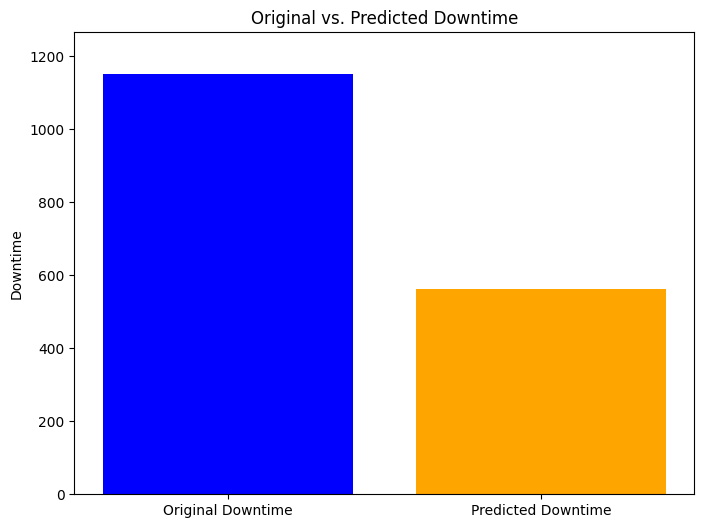

In [41]:
# Data for visualization
labels = ['Original Downtime', 'Predicted Downtime']
values = [original_downtime, new_downtime]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Downtime')
plt.title('Original vs. Predicted Downtime')
plt.ylim(0, max(original_downtime, new_downtime) * 1.1)  # Set ylim slightly above max value for clarity
plt.show()

2. Pie Chart for Downtime Reduction Percentage

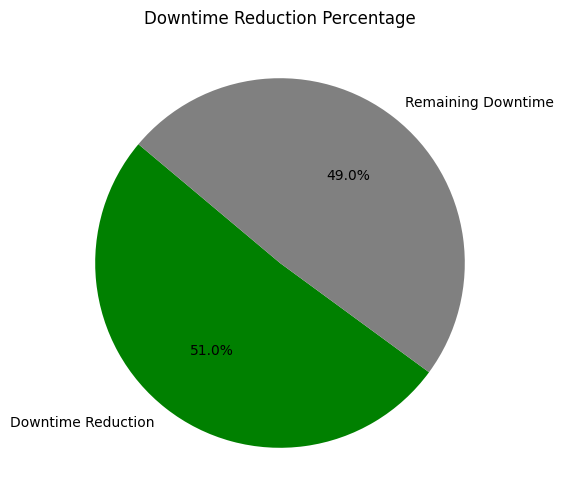

In [42]:
# Data for visualization
labels = ['Downtime Reduction', 'Remaining Downtime']
sizes = [downtime_reduction_percent, 100 - downtime_reduction_percent]

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'gray'], startangle=140)
plt.title('Downtime Reduction Percentage')
plt.show()

3. Bar Plot for Cost Savings

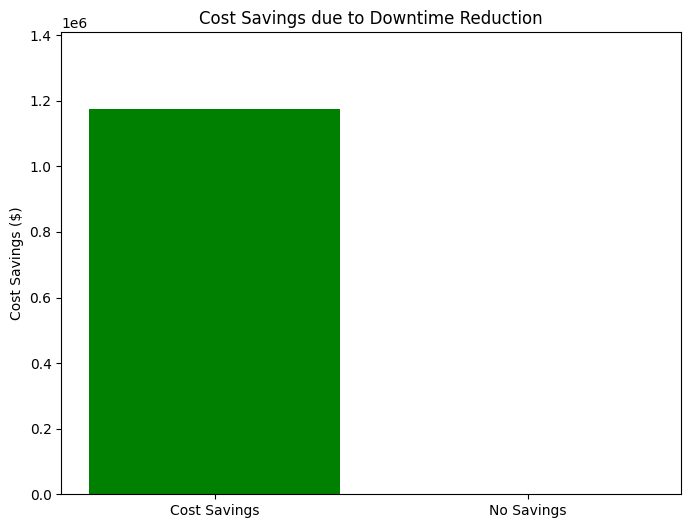

In [43]:
# Data for visualization
savings_labels = ['Cost Savings', 'No Savings']
savings_values = [cost_savings, 0]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(savings_labels, savings_values, color=['green', 'red'])
plt.ylabel('Cost Savings ($)')
plt.title('Cost Savings due to Downtime Reduction')
plt.ylim(0, max(cost_savings, 0) * 1.2)  # Set ylim slightly above max value for clarity
plt.show()

4. Target Met Indicators

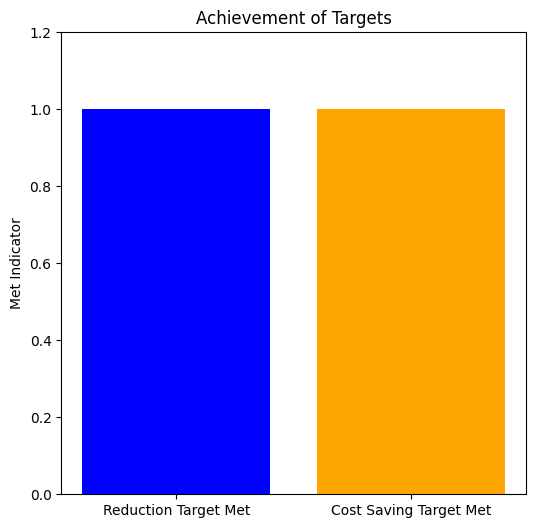

In [44]:
# Data for visualization
target_labels = ['Reduction Target Met', 'Cost Saving Target Met']
target_values = [int(reduction_target_met), int(cost_saving_target_met)]

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(target_labels, target_values, color=['blue', 'orange'])
plt.ylabel('Met Indicator')
plt.title('Achievement of Targets')
plt.ylim(0, 1.2)  # Set ylim from 0 to 1.2 for clarity
plt.show()

SUMMARY

### Model Evaluation

- **Accuracy:** 99.37% (Excellent performance)
- **Downtime Reduction:**  achieved 
- **Cost Savings:** achieved 
